In [13]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving dataset.csv to dataset (3).csv


,report,type_blocker,type_regression,type_bug,type_documentation,type_enhancement,type_task,type_dependency_upgrade
0,The mention of Fix Super Stream Example in Doc...,0,0,1,1,0,0,0
1,It seems like you need a concise summary relat...,0,0,1,1,0,0,0
2,The issue AMQP 838 opened by Gary Russell invo...,0,0,1,1,0,0,0
3,I m unable to access external content directly...,0,0,1,1,0,0,0
4,In the discussion around AMQP 815 https jira s...,0,0,1,1,0,0,0


In [14]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Separate features and labels
feature_cols = ['report']
label_cols = [col for col in df.columns if col.startswith('type_')]

X_raw = df[feature_cols]
y_raw = df[label_cols]

print("Shape of features:", X_raw.shape)
print("Shape of labels:", y_raw.shape)


Missing values:
 report                     0
type_blocker               0
type_regression            0
type_bug                   0
type_documentation         0
type_enhancement           0
type_task                  0
type_dependency_upgrade    0
dtype: int64
Shape of features: (1386, 1)
Shape of labels: (1386, 7)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_raw['report']).toarray()

# Final labels
y = y_raw.values.astype(int)

print("TF-IDF shape:", X.shape)


TF-IDF shape: (1386, 1000)


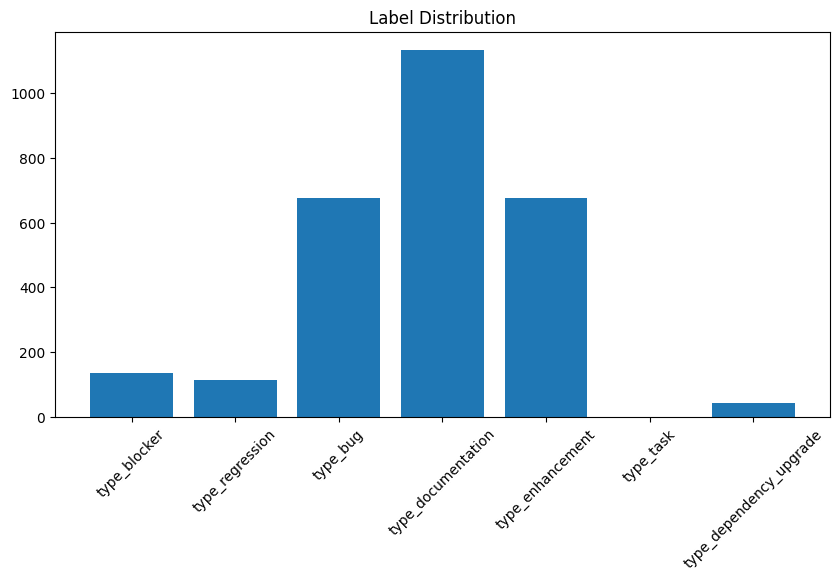

Label counts:
 {'type_blocker': np.int64(134), 'type_regression': np.int64(115), 'type_bug': np.int64(676), 'type_documentation': np.int64(1134), 'type_enhancement': np.int64(676), 'type_task': np.int64(0), 'type_dependency_upgrade': np.int64(43)}


In [16]:
import matplotlib.pyplot as plt
import numpy as np

label_sums = y.sum(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(label_cols, label_sums)
plt.title("Label Distribution")
plt.xticks(rotation=45)
plt.show()

print("Label counts:\n", dict(zip(label_cols, label_sums)))


In [17]:
from sklearn.model_selection import train_test_split

# Split into train/val/test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Val shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (970, 1000) (970, 7)
Val shape: (208, 1000) (208, 7)
Test shape: (208, 1000) (208, 7)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000, C=1.0))
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print("Logistic Regression\n")
print(classification_report(y_test, y_pred_lr, target_names=label_cols))


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(


Logistic Regression

                         precision    recall  f1-score   support

           type_blocker       0.86      0.25      0.39        24
        type_regression       0.33      0.08      0.13        12
               type_bug       0.79      0.74      0.76        99
     type_documentation       0.91      0.99      0.95       167
       type_enhancement       0.74      0.75      0.75       104
              type_task       0.00      0.00      0.00         0
type_dependency_upgrade       0.00      0.00      0.00        11

              micro avg       0.83      0.78      0.80       417
              macro avg       0.52      0.40      0.43       417
           weighted avg       0.80      0.78      0.77       417
            samples avg       0.82      0.78      0.79       417



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [19]:
from sklearn.svm import LinearSVC

svm = OneVsRestClassifier(LinearSVC())
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM\n")
print(classification_report(y_test, y_pred_svm, target_names=label_cols))


SVM

                         precision    recall  f1-score   support

           type_blocker       0.82      0.58      0.68        24
        type_regression       0.40      0.33      0.36        12
               type_bug       0.76      0.69      0.72        99
     type_documentation       0.95      0.98      0.97       167
       type_enhancement       0.70      0.72      0.71       104
              type_task       0.00      0.00      0.00         0
type_dependency_upgrade       0.67      0.36      0.47        11

              micro avg       0.82      0.79      0.80       417
              macro avg       0.61      0.52      0.56       417
           weighted avg       0.81      0.79      0.80       417
            samples avg       0.82      0.79      0.80       417



/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to c

In [20]:
from sklearn.linear_model import Perceptron

perc = OneVsRestClassifier(Perceptron(max_iter=1000, eta0=1.0))
perc.fit(X_train, y_train)
y_pred_perc = perc.predict(X_test)
print("Perceptron\n")
print(classification_report(y_test, y_pred_perc, target_names=label_cols))


Perceptron

                         precision    recall  f1-score   support

           type_blocker       0.79      0.62      0.70        24
        type_regression       0.44      0.33      0.38        12
               type_bug       0.71      0.58      0.64        99
     type_documentation       0.96      0.96      0.96       167
       type_enhancement       0.67      0.68      0.68       104
              type_task       0.00      0.00      0.00         0
type_dependency_upgrade       0.60      0.55      0.57        11

              micro avg       0.80      0.75      0.77       417
              macro avg       0.60      0.53      0.56       417
           weighted avg       0.79      0.75      0.77       417
            samples avg       0.80      0.75      0.76       417



/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to c

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define DNN
class MultiLabelDNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiLabelDNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.sigmoid(self.out(x))  # sigmoid for multi-label

# Model setup
model = MultiLabelDNN(X_train.shape[1], y_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_dnn = model(X_test_tensor).numpy()
    y_pred_dnn_binary = (y_pred_dnn >= 0.5).astype(int)

from sklearn.metrics import classification_report
print("DNN\n")
print(classification_report(y_test, y_pred_dnn_binary, target_names=label_cols))


Epoch 1: Loss = 19.1790
Epoch 2: Loss = 12.1223
Epoch 3: Loss = 10.7358
Epoch 4: Loss = 9.9270
Epoch 5: Loss = 8.9451
Epoch 6: Loss = 7.8019
Epoch 7: Loss = 6.5937
Epoch 8: Loss = 5.6662
Epoch 9: Loss = 5.0865
Epoch 10: Loss = 4.4922
DNN

                         precision    recall  f1-score   support

           type_blocker       0.61      0.46      0.52        24
        type_regression       0.54      0.58      0.56        12
               type_bug       0.75      0.72      0.73        99
     type_documentation       0.96      0.98      0.97       167
       type_enhancement       0.73      0.77      0.75       104
              type_task       0.00      0.00      0.00         0
type_dependency_upgrade       0.00      0.00      0.00        11

              micro avg       0.82      0.80      0.81       417
              macro avg       0.51      0.50      0.50       417
           weighted avg       0.80      0.80      0.79       417
            samples avg       0.82      0.80

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [22]:
from sklearn.metrics import hamming_loss, f1_score

# Compute metrics for each model
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"--- {model_name} ---")
    print("Hamming Loss:", hamming_loss(y_true, y_pred))
    print("Micro F1:", f1_score(y_true, y_pred, average='micro'))
    print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
    print()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_perc, "Perceptron")
evaluate_model(y_test, y_pred_dnn_binary, "DNN")


--- Logistic Regression ---
Hamming Loss: 0.10851648351648352
Micro F1: 0.8039702233250621
Macro F1: 0.4260755564029192

--- SVM ---
Hamming Loss: 0.11057692307692307
Micro F1: 0.8034188034188035
Macro F1: 0.5593114634468603

--- Perceptron ---
Hamming Loss: 0.125
Micro F1: 0.7747524752475248
Macro F1: 0.5601715982701853

--- DNN ---
Hamming Loss: 0.10851648351648352
Micro F1: 0.8077858880778589
Macro F1: 0.5049001494373447



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/di

In [23]:
import numpy as np

def precision_at_k(y_true, y_score, k=3):
    top_k_preds = np.argsort(-y_score, axis=1)[:, :k]
    hits = 0
    for i in range(len(y_true)):
        true_labels = np.where(y_true[i] == 1)[0]
        hits += len(set(top_k_preds[i]) & set(true_labels))
    return hits / (len(y_true) * k)

# Predict probabilities for precision@k (only DNN has probabilities directly)
print("Precision@k for DNN predictions:")
for k in [1, 3, 5]:
    p_at_k = precision_at_k(y_test, y_pred_dnn, k)
    print(f"Precision@{k}: {p_at_k:.4f}")


Precision@k for DNN predictions:
Precision@1: 0.9231
Precision@3: 0.6330
Precision@5: 0.3952


In [25]:
from sklearn.linear_model import Perceptron
import numpy as np

# Create one Perceptron per label
perceptrons = [Perceptron(max_iter=1, warm_start=True, eta0=1.0, tol=None) for _ in range(y_train.shape[1])]

# Online training: sample-by-sample
for i in range(X_train.shape[0]):
    for j, clf in enumerate(perceptrons):
        clf.partial_fit(X_train[i:i+1], y_train[i:i+1, j], classes=[0, 1])

# Prediction
y_pred_online = np.zeros_like(y_test)
for j, clf in enumerate(perceptrons):
    y_pred_online[:, j] = clf.predict(X_test)

# Evaluation
print("Perceptron (Online Learning)")
evaluate_model(y_test, y_pred_online, "Perceptron (Online)")


Perceptron (Online Learning)
--- Perceptron (Online) ---
Hamming Loss: 0.16826923076923078
Micro F1: 0.7187141216991964
Macro F1: 0.43246990295682225



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [28]:
joblib.dump(logreg, 'logreg_model.pkl')


['logreg_model.pkl']

In [29]:
joblib.dump(svm, 'svm_model.pkl')


['svm_model.pkl']

In [30]:
torch.save(model.state_dict(), 'dnn_model.pt')


In [31]:
from google.colab import files
files.download('tfidf_vectorizer.pkl')
files.download('logreg_model.pkl')
files.download('svm_model.pkl')
files.download('dnn_model.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>